In [1]:
import re
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
logfile_path = 'bs1-256.log'

In [3]:
pattern = re.compile(
    r"CID:(\d+),ROUND:(\d+),BATCH_SIZE:(\d+),MINIBATCH:(\d+),LOSS:[\d.]+,ACCURACY:[\d.]+,TIME:([\d.]+),MEMORY:([\d.]+)MB"
)

In [4]:
def add_value_labels(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2.0,
            height,
            f'{height:.2f}',
            ha='center',
            va='bottom',
            fontsize=9
        )


In [5]:
records = []

with open(logfile_path, "r") as f:
    for line in f:
        match = pattern.search(line)
        if match:
            cid, round_, bs, mb, time, mem = match.groups()
            records.append({
                "ClientID": int(cid),
                "Round": int(round_),
                "BatchSize": int(bs),
                "Minibatch": int(mb),
                "Time": float(time),
                "Memory_MB": float(mem)
            })

df = pd.DataFrame(records)
df

,ClientID,Round,BatchSize,Minibatch,Time,Memory_MB
0,10,1,1,1,0.0258,1032.04
1,10,1,1,2,0.0177,1032.04
2,10,1,1,3,0.0220,1032.04
3,10,1,1,4,0.0237,1032.04
4,10,1,1,5,0.0186,1032.96
...,...,...,...,...,...,...
9628,7,10,2048,5,9.9107,1384.28
9629,7,10,2048,6,3.1466,1384.37
9630,7,10,2048,7,9.7918,1384.32
9631,7,10,2048,8,9.9063,1384.34


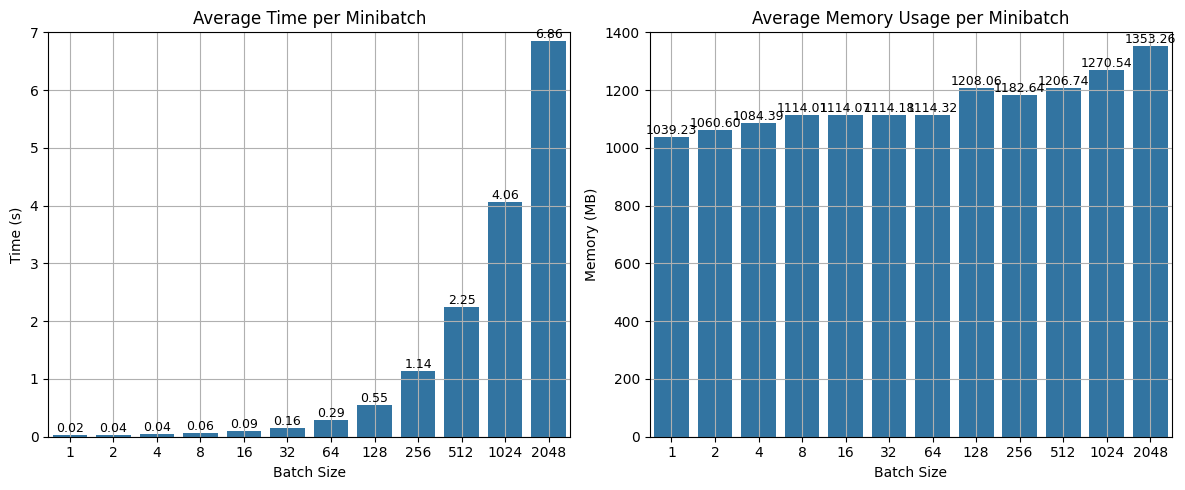

In [6]:
# Task 1: Average time and memory per minibatch
agg_df = df.groupby("BatchSize")[["Time", "Memory_MB"]].mean().reset_index()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
ax1 = sns.barplot(x="BatchSize", y="Time", data=agg_df)
plt.title("Average Time per Minibatch")
plt.ylabel("Time (s)")
plt.xlabel("Batch Size")
plt.grid(True)
add_value_labels(ax1)
ymax = agg_df["Time"].max()
plt.ylim(0, math.ceil(ymax))

plt.subplot(1, 2, 2)
ax2 = sns.barplot(x="BatchSize", y="Memory_MB", data=agg_df)
plt.title("Average Memory Usage per Minibatch")
plt.ylabel("Memory (MB)")
plt.xlabel("Batch Size")
plt.grid(True)
add_value_labels(ax2)
ymax = agg_df["Memory_MB"].max()
plt.ylim(0, 1400)

plt.tight_layout()
plt.show()


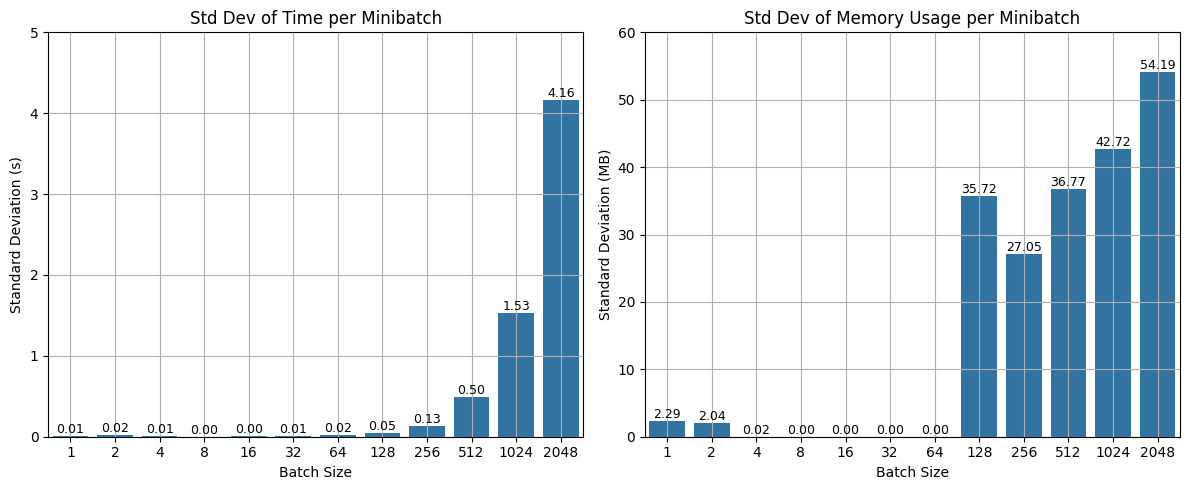

In [9]:
# Task 2: Std deviation in time and memory
var_df = df.groupby("BatchSize")[["Time", "Memory_MB"]].std().reset_index()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
ax3 = sns.barplot(x="BatchSize", y="Time", data=var_df)
plt.title("Std Dev of Time per Minibatch")
plt.ylabel("Standard Deviation (s)")
plt.xlabel("Batch Size")
plt.grid(True)
add_value_labels(ax3)
ymax = var_df["Time"].max()
plt.ylim(0, math.ceil(ymax))

plt.subplot(1, 2, 2)
ax4 = sns.barplot(x="BatchSize", y="Memory_MB", data=var_df)
plt.title("Std Dev of Memory Usage per Minibatch")
plt.ylabel("Standard Deviation (MB)")
plt.xlabel("Batch Size")
plt.grid(True)
add_value_labels(ax4)
ymax = var_df["Memory_MB"].max()
plt.ylim(0, 60)

plt.tight_layout()
plt.show()

In [10]:
pattern = re.compile(
    r"CID:(\d+),ROUND:(\d+),BATCH_SIZE:(\d+),AVG_LOSS:[\d.]+,AVG_ACCURACY:([\d.]+),AVG_TIME:[\d.]+,AVG_MEMORY:[\d.]+MB"
)

records = []

with open(logfile_path, "r") as f:
    for line in f:
        match = pattern.search(line)
        if match:
            cid, round_, bs, acc = match.groups()
            records.append({
                "ClientID": int(cid),
                "Round": int(round_),
                "BatchSize": int(bs),
                "AvgAccuracy": float(acc)
            })

df = pd.DataFrame(records)

agg_df = df.groupby("BatchSize")["AvgAccuracy"].agg(["mean", "std"]).reset_index()
agg_df.rename(columns={"mean": "MeanAccuracy", "std": "StdAccuracy"}, inplace=True)

/var/folders/xk/13h_3nkj4b375xn1m_443l340000gn/T/ipykernel_56117/3433290042.py:22: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(x="BatchSize", y="AvgAccuracy", data=df, inner="box", scale="width")


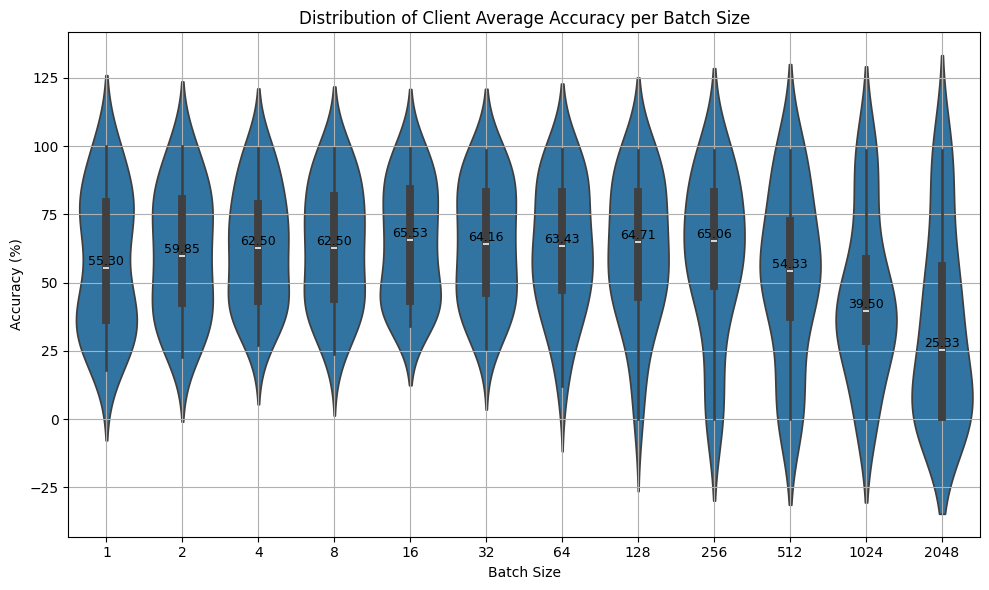

In [12]:
pattern = re.compile(
    r"CID:(\d+),ROUND:(\d+),BATCH_SIZE:(\d+),AVG_LOSS:[\d.]+,AVG_ACCURACY:([\d.]+),AVG_TIME:[\d.]+,AVG_MEMORY:[\d.]+MB"
)

records = []

with open(logfile_path, "r") as f:
    for line in f:
        match = pattern.search(line)
        if match:
            cid, round_, bs, acc = match.groups()
            records.append({
                "ClientID": int(cid),
                "Round": int(round_),
                "BatchSize": int(bs),
                "AvgAccuracy": float(acc)
            })

df = pd.DataFrame(records)

plt.figure(figsize=(10, 6))
ax = sns.violinplot(x="BatchSize", y="AvgAccuracy", data=df, inner="box", scale="width")
plt.title("Distribution of Client Average Accuracy per Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("Accuracy (%)")
plt.grid(True)

# Add median annotations
medians = df.groupby("BatchSize")["AvgAccuracy"].median().reset_index()
for idx, row in medians.iterrows():
    x_pos = df["BatchSize"].sort_values().unique().tolist().index(row["BatchSize"])
    ax.text(x_pos, row["AvgAccuracy"], f'{row["AvgAccuracy"]:.2f}', 
            horizontalalignment='center', verticalalignment='bottom', color='black', fontsize=9)

plt.tight_layout()
plt.show()


In [ ]:
df

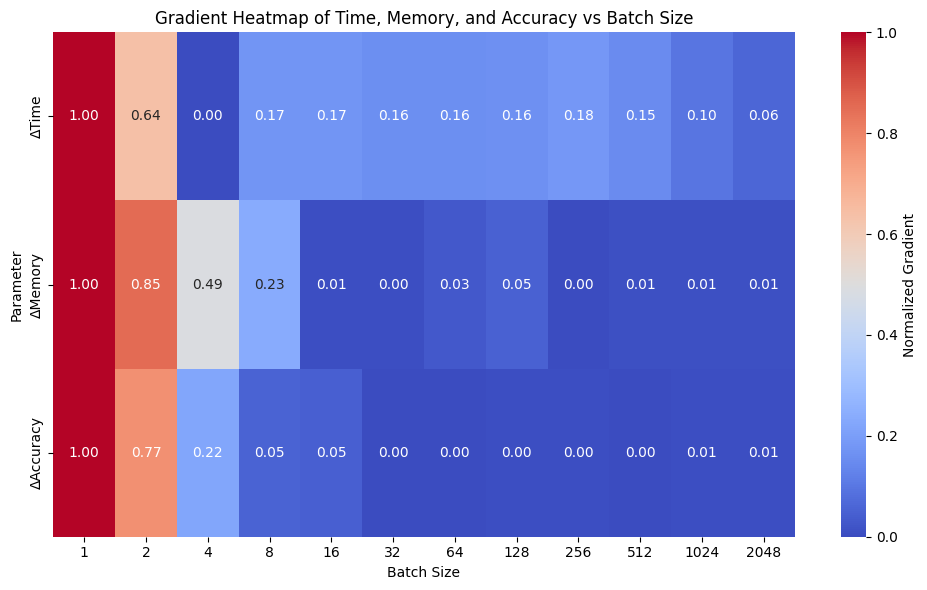

In [13]:
minibatch_pattern = re.compile(
    r"CID:(\d+),ROUND:(\d+),BATCH_SIZE:(\d+),MINIBATCH:(\d+),LOSS:[\d.]+,ACCURACY:[\d.]+,TIME:([\d.]+),MEMORY:([\d.]+)MB"
)
avg_pattern = re.compile(
    r"CID:(\d+),ROUND:(\d+),BATCH_SIZE:(\d+),AVG_LOSS:[\d.]+,AVG_ACCURACY:([\d.]+),AVG_TIME:[\d.]+,AVG_MEMORY:[\d.]+MB"
)

records = []
accuracy_records = []

with open(logfile_path, "r") as f:
    for line in f:
        m1 = minibatch_pattern.search(line)
        if m1:
            cid, round_, bs, mb, time, mem = m1.groups()
            records.append({
                "BatchSize": int(bs),
                "Time": float(time),
                "Memory_MB": float(mem)
            })
        m2 = avg_pattern.search(line)
        if m2:
            cid, round_, bs, acc = m2.groups()
            accuracy_records.append({
                "BatchSize": int(bs),
                "Accuracy": float(acc)
            })

df_time_mem = pd.DataFrame(records)
df_acc = pd.DataFrame(accuracy_records)

# Aggregate mean values for each batch size
agg_time_mem = df_time_mem.groupby("BatchSize")[["Time", "Memory_MB"]].mean().reset_index()
agg_acc = df_acc.groupby("BatchSize")["Accuracy"].mean().reset_index()

# Merge all into one
agg_df = pd.merge(agg_time_mem, agg_acc, on="BatchSize").sort_values("BatchSize").reset_index(drop=True)

# Compute gradients (finite differences) wrt batch size
agg_df["dTime"] = np.gradient(agg_df["Time"], agg_df["BatchSize"])
agg_df["dMemory"] = np.gradient(agg_df["Memory_MB"], agg_df["BatchSize"])
agg_df["dAccuracy"] = np.gradient(agg_df["Accuracy"], agg_df["BatchSize"])

# Normalize for visualization
gradients = agg_df[["dTime", "dMemory", "dAccuracy"]]
normalized = (gradients - gradients.min()) / (gradients.max() - gradients.min())

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    normalized.T, annot=True, fmt=".2f",
    xticklabels=agg_df["BatchSize"].tolist(),
    yticklabels=["ΔTime", "ΔMemory", "ΔAccuracy"],
    cmap="coolwarm", cbar_kws={"label": "Normalized Gradient"}
)
plt.title("Gradient Heatmap of Time, Memory, and Accuracy vs Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("Parameter")
plt.tight_layout()
plt.show()

Decision:
- Batch size = 2 gives a large accuracy gain (0.77) with moderate increase in cost (ΔTime: 0.64, ΔMemory: 0.85).

- Batch size = 4 gives modest accuracy gain (0.22) but low cost (ΔTime: 0.00, ΔMemory: 0.49).

- Beyond batch size = 8, gains in accuracy are negligible.

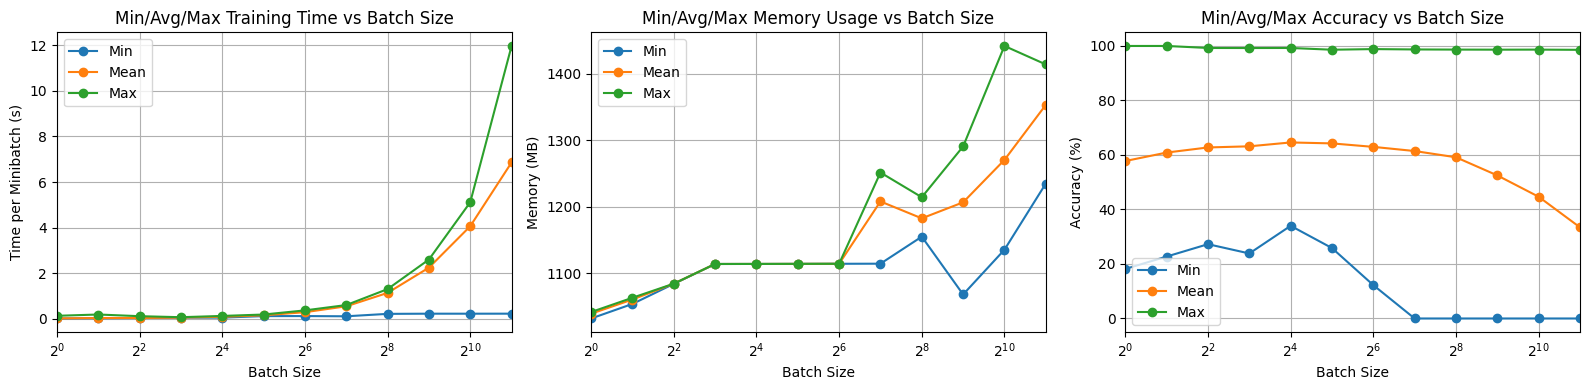

In [18]:
minibatch_pattern = re.compile(
    r"CID:(\d+),ROUND:(\d+),BATCH_SIZE:(\d+),MINIBATCH:(\d+),LOSS:[\d.]+,ACCURACY:[\d.]+,TIME:([\d.]+),MEMORY:([\d.]+)MB"
)
avg_pattern = re.compile(
    r"CID:(\d+),ROUND:(\d+),BATCH_SIZE:(\d+),AVG_LOSS:[\d.]+,AVG_ACCURACY:([\d.]+),AVG_TIME:[\d.]+,AVG_MEMORY:[\d.]+MB"
)

records = []
accuracy_records = []

with open(logfile_path, "r") as f:
    for line in f:
        m1 = minibatch_pattern.search(line)
        if m1:
            cid, round_, bs, mb, time, mem = m1.groups()
            records.append({
                "BatchSize": int(bs),
                "Time": float(time),
                "Memory_MB": float(mem)
            })
        m2 = avg_pattern.search(line)
        if m2:
            cid, round_, bs, acc = m2.groups()
            accuracy_records.append({
                "BatchSize": int(bs),
                "Accuracy": float(acc)
            })

df_time_mem = pd.DataFrame(records)
df_acc = pd.DataFrame(accuracy_records)

# Aggregate stats: min, mean, max
agg_time = df_time_mem.groupby("BatchSize")["Time"].agg(["min", "mean", "max"]).reset_index()
agg_mem = df_time_mem.groupby("BatchSize")["Memory_MB"].agg(["min", "mean", "max"]).reset_index()
agg_acc = df_acc.groupby("BatchSize")["Accuracy"].agg(["min", "mean", "max"]).reset_index()

# Plot
plt.figure(figsize=(16, 4))

# Training time
plt.subplot(1, 3, 1)
plt.plot(agg_time["BatchSize"], agg_time["min"], label="Min", marker="o")
plt.plot(agg_time["BatchSize"], agg_time["mean"], label="Mean", marker="o")
plt.plot(agg_time["BatchSize"], agg_time["max"], label="Max", marker="o")
plt.title("Min/Avg/Max Training Time vs Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("Time per Minibatch (s)")
plt.grid(True)
plt.xlim(1, 2048)
plt.xscale('log', base=2)
plt.legend()

# Memory usage
plt.subplot(1, 3, 2)
plt.plot(agg_mem["BatchSize"], agg_mem["min"], label="Min", marker="o")
plt.plot(agg_mem["BatchSize"], agg_mem["mean"], label="Mean", marker="o")
plt.plot(agg_mem["BatchSize"], agg_mem["max"], label="Max", marker="o")
plt.title("Min/Avg/Max Memory Usage vs Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("Memory (MB)")
plt.grid(True)
plt.xlim(1, 2048)
plt.xscale('log', base=2)
plt.legend()

# Accuracy
plt.subplot(1, 3, 3)
plt.plot(agg_acc["BatchSize"], agg_acc["min"], label="Min", marker="o")
plt.plot(agg_acc["BatchSize"], agg_acc["mean"], label="Mean", marker="o")
plt.plot(agg_acc["BatchSize"], agg_acc["max"], label="Max", marker="o")
plt.title("Min/Avg/Max Accuracy vs Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.xlim(1, 2048)
plt.xscale('log', base=2)
plt.legend()

plt.tight_layout()
plt.show()